# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import pylab as p
import numpy as np
import pandas as pd

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [ ]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
from scipy.stats import uniform

In [4]:
def gen_unif(bottom,ceiling,count):
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    randoms  = a + (b-a)*x
    return randoms

In [8]:
samp_1 = gen_unif(10,15,100)

In [9]:
samp_2 = gen_unif(10,60,1000)

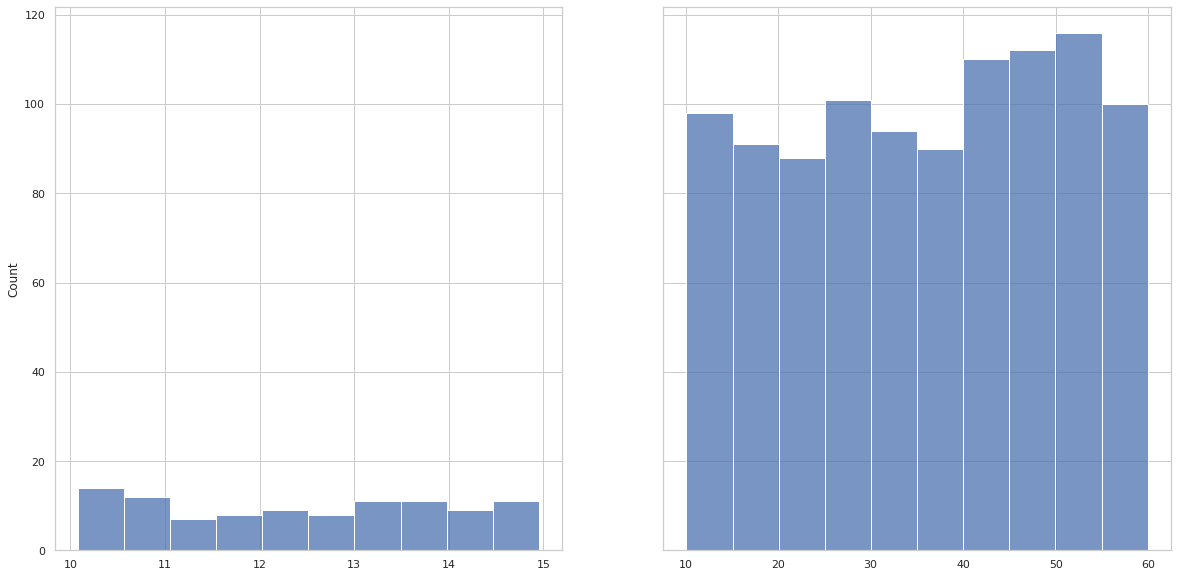

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
sns.histplot(samp_1,ax=axs[0],bins=10)
sns.histplot(samp_2,ax=axs[1],bins=10);

How are the two distributions different?

- LEFT:   range = 10-15 , total counts = 100       
- RIGHT:  range = 10-60 , total counts = 1000

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [15]:
from scipy.stats import norm

In [17]:
def gen_normal(media,desvest,num):
    return norm(loc=media, scale=desvest).rvs(size=num)

In [18]:
samp_1 = gen_normal(10,1,1000)

In [19]:
samp_2 = gen_normal(10,50,1000)

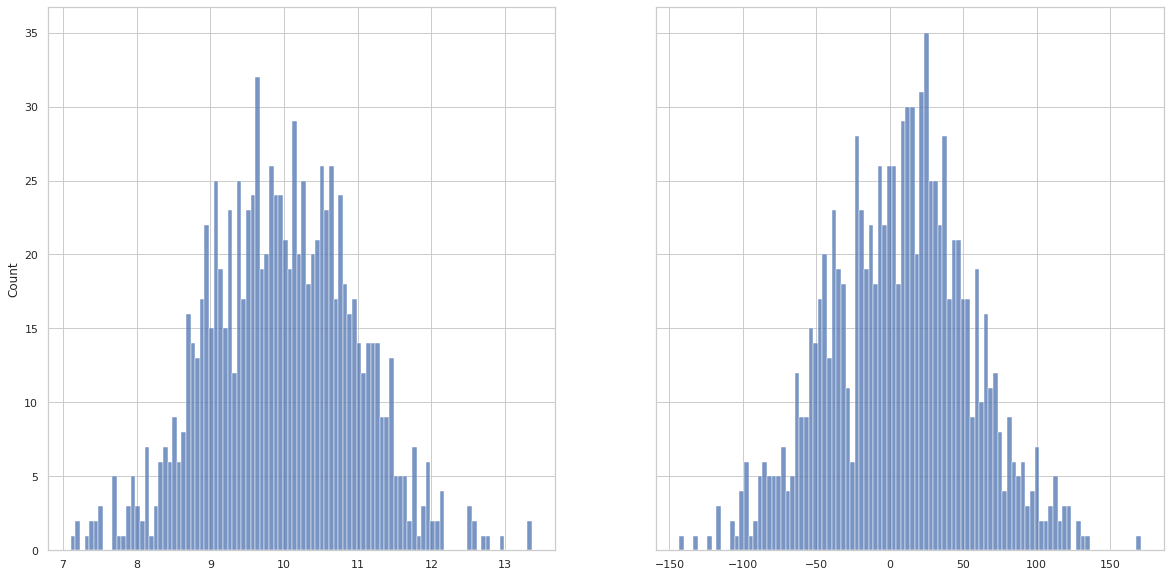

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
sns.histplot(samp_1,ax=axs[0],bins=100)
sns.histplot(samp_2,ax=axs[1],bins=100);

How are the two distributions different?

- LEFT:   range ~= 7-13 , 100 narrow bins      
- RIGHT:  range ~= -120-120 , 100 broader(x10) bins, 

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [22]:
df = pd.read_csv("vehicles.csv")

In [24]:
df.sample(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
28521,Pontiac,G6,2010,2.4,4.0,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,13.184400,22,30,25,355.480000,1350
31379,Subaru,Legacy AWD,2012,2.5,4.0,Manual 6-spd,All-Wheel Drive,Midsize Cars,Regular,14.982273,19,27,22,403.954545,1500
29227,Porsche,911 GT3,2015,3.8,6.0,Auto(AM-S7),Rear-Wheel Drive,Two Seaters,Premium,19.388824,15,20,17,529.000000,2400


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

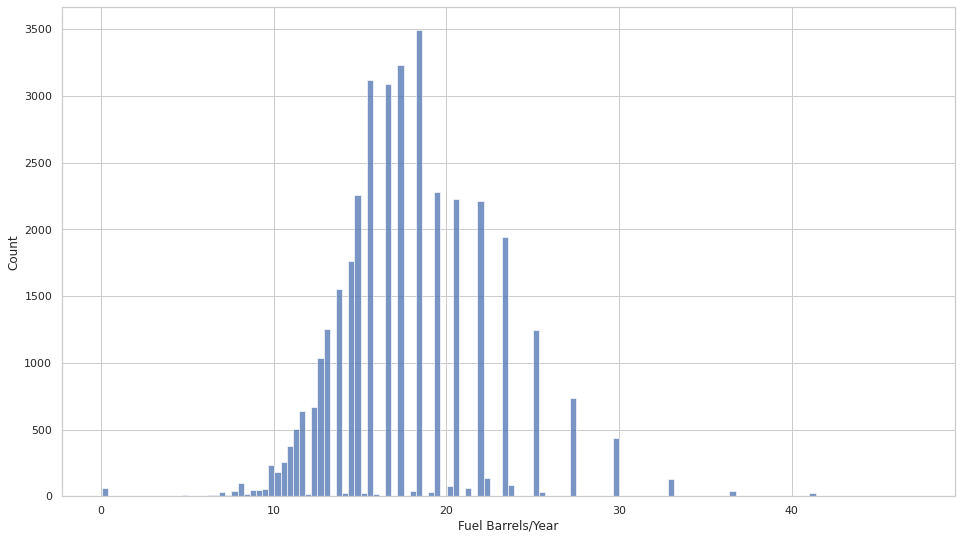

In [28]:
sns.histplot(df["Fuel Barrels/Year"]);

2. CO2 Emission Grams/Mile 

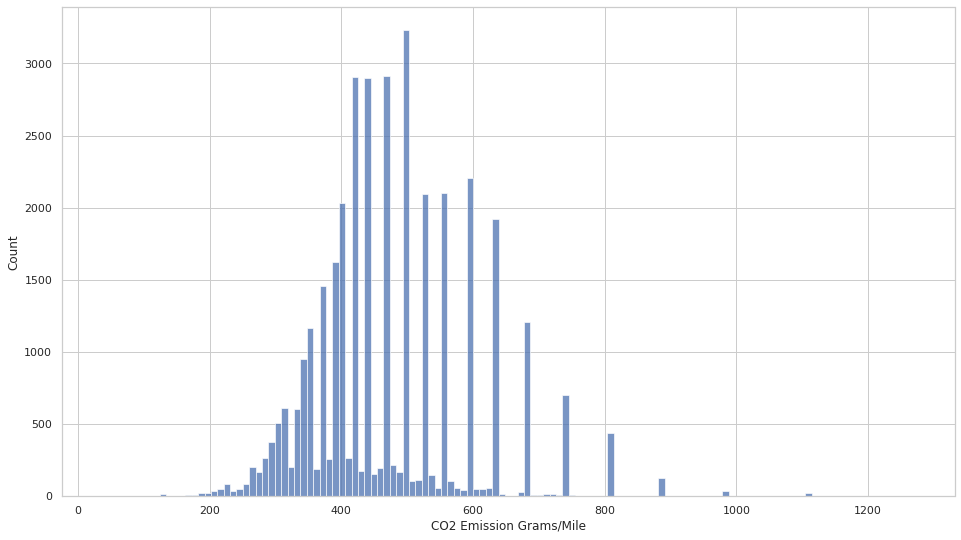

In [29]:
sns.histplot(df["CO2 Emission Grams/Mile"]);

3. Combined MPG

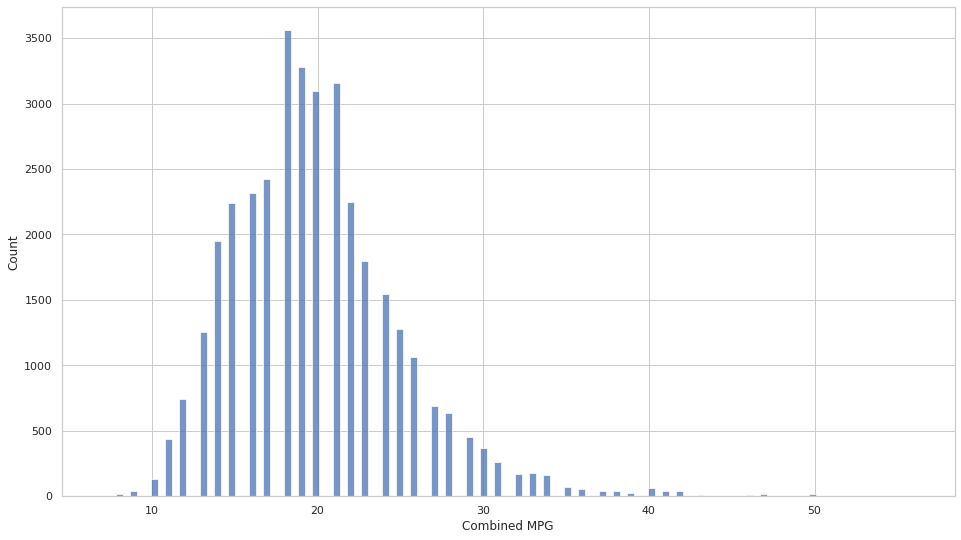

In [30]:
sns.histplot(df["Combined MPG"]);

Which one(s) of the variables are nearly normally distributed? How do you know?

The 2 first, because of their shape

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [31]:
import numpy as np

In [36]:
def expon(size):
    return np.random.exponential(10,size)

In [42]:
s1 = expon(10)

In [43]:
s2 = expon(100)

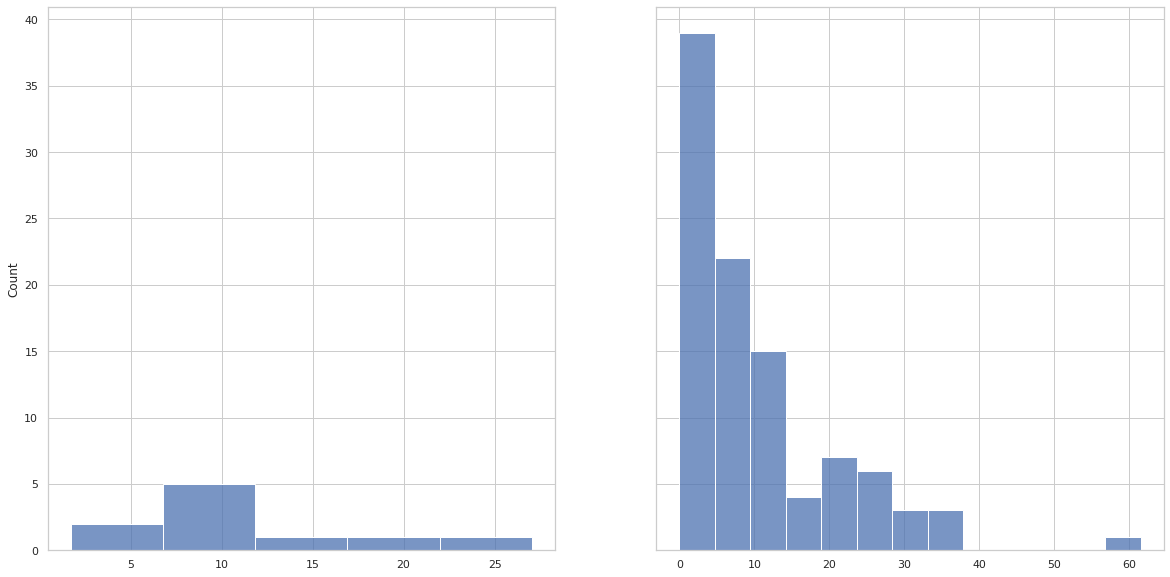

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
sns.histplot(s1,ax=axs[0])
sns.histplot(s2,ax=axs[1]);

How are the two distributions different?

s2 has 10x more events, but similarly distributed

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [45]:
from scipy.stats import expon

In [46]:
bank = expon(10)

What is the probability that the customer will spend more than 15 minutes

In [48]:
1-bank.cdf(15)

0.006737946999085476

In [49]:
fig = sns.histplot(bank)
fig.axvline(x=bank.mean(), color="red", label="media")
fig.legend();

TypeError: object of type 'rv_frozen' has no len()